In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import biomassml
from biomassml.io import *
from biomassml.predict_outputs import *

DATA_DIR = '.../data'
MODEL_DIR = '.../biomassml/'

output_names = ['CO (vol%)', r'H$_2$ (vol%)', r'CH$_4$ (vol%)', 'COMBgas (vol%)', 
                r'H$_2$/CO', r'GAS (m$^3$/kg biom)', r'E$_{\rm yield}$ (MJ/kg biom)']

### load training GASIF dataset

In [3]:
dfGASIF_dataset = pd.read_csv(os.path.join(DATA_DIR, 'data_GASIF_biomass.csv'))

In [4]:
dfGASIF_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BIOMASS           30 non-null     object 
 1   SA                30 non-null     float64
 2   SBR               30 non-null     float64
 3   HHVbiom (MJ/kg)   30 non-null     float64
 4   T (K)             30 non-null     int64  
 5   SR                30 non-null     float64
 6   C (%)             30 non-null     float64
 7   N (%)             30 non-null     float64
 8   H (%)             30 non-null     float64
 9   S (%)             30 non-null     float64
 10  O (%)             30 non-null     float64
 11  ash (%)           30 non-null     float64
 12  VM (%)            30 non-null     float64
 13  FC (%)            30 non-null     float64
 14  MC (%)            30 non-null     float64
 15  volCO2 (%)        30 non-null     float64
 16  volCO (%)         30 non-null     float64
 17 

In [5]:
FEATURES_GASIF = pd.concat([dfGASIF_dataset.iloc[:,1:7], dfGASIF_dataset.iloc[:,[8,10,11,12,13,14]]], axis=1)
FEATURES_GASIF.head(1)

,SA,SBR,HHVbiom (MJ/kg),T (K),SR,C (%),H (%),O (%),ash (%),VM (%),FC (%),MC (%)
0,2.33,1.1,19.5649,1173,0.13,49.44,5.85,42.9,1.45,78.93,19.62,6.52


In [6]:
TARGETS_GASIF = dfGASIF_dataset.iloc[:,[16,18,19,20]]
TARGETS_GASIF.head(1)

,volCO (%),volH2 (%),volCOMB (%),GAS (m3/kg biom)
0,23.6541,36.4296,67.4756,0.7975


#### get scalers from dfGASIF_dataset

In [7]:
x_scaler, y_scaler = get_scalers(FEATURES_GASIF, TARGETS_GASIF)
joblib.dump(x_scaler, 'x_scaler')
joblib.dump(y_scaler, 'y_scaler')

['y_scaler']

### load model

In [9]:
model = load_joblib(os.path.join(MODEL_DIR, 'model_GPR_retrained'))

### predictions for NEW BIOMASSES

In [10]:
df_newBIOMASSES = pd.read_csv(os.path.join(DATA_DIR, 'data_NEW_biomasses.csv'))

In [11]:
df_newBIOMASSES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BIOMASS_name     68 non-null     object 
 1   BIOMASS_name2    68 non-null     object 
 2   BIOMASS          68 non-null     object 
 3   ORIGIN           68 non-null     object 
 4   SA               68 non-null     float64
 5   SBR              68 non-null     float64
 6   HHVbiom (MJ/kg)  68 non-null     float64
 7   T (K)            68 non-null     int64  
 8   SR               68 non-null     float64
 9   C (%)            68 non-null     float64
 10  N (%)            68 non-null     float64
 11  H (%)            68 non-null     float64
 12  S (%)            68 non-null     float64
 13  O (%)            68 non-null     float64
 14  ash (%)          68 non-null     float64
 15  VM (%)           68 non-null     float64
 16  FC (%)           68 non-null     float64
 17  MC (%)           6

#### T = 1173 K, SA = 2.33

In [12]:
FEATURES_NEWbiomass = pd.concat([df_newBIOMASSES.iloc[:,4:10], df_newBIOMASSES.iloc[:,[11,13,14,15,16,17]]], axis=1)
FEATURES_NEWbiomass.head(2)

,SA,SBR,HHVbiom (MJ/kg),T (K),SR,C (%),H (%),O (%),ash (%),VM (%),FC (%),MC (%)
0,2.3333,2.0502,18.77,1173,0.25,46.50,5.97,40.16,6.18,73.21,20.61,8.18
1,2.3333,2.2003,19.05,1173,0.25,50.14,5.95,40.10,3.04,76.10,20.86,7.85


In [13]:
X=FEATURES_NEWbiomass
y = TARGETS_GASIF

y_pred_mu_CO = predict_CO(X, model, x_scaler, y_scaler)[0]
y_pred_std_CO = predict_CO(X, model, x_scaler, y_scaler)[1]

y_pred_mu_H2 = predict_H2(X, model, x_scaler, y_scaler)[0]
y_pred_std_H2 = predict_H2(X, model, x_scaler, y_scaler)[1]

y_pred_mu_COMB = predict_COMB(X, model, x_scaler, y_scaler)[0]
y_pred_std_COMB = predict_COMB(X, model, x_scaler, y_scaler)[1]

y_pred_mu_GAS = predict_GAS(X, model, x_scaler, y_scaler)[0]
y_pred_std_GAS = predict_GAS(X, model, x_scaler, y_scaler)[1]

y_pred_mu_CH4 = predict_CH4_covar(X, y, model, x_scaler, y_scaler)[0]
y_pred_std_CH4_covar = predict_CH4_covar(X, y, model, x_scaler, y_scaler)[1]

y_pred_mu_H2CO = predict_H2CO(X, model, x_scaler, y_scaler)[0]
y_pred_std_H2CO = predict_H2CO(X, model, x_scaler, y_scaler)[1]

y_pred_mu_Eyield = predict_Eyield(X, model, x_scaler, y_scaler)[0]
y_pred_std_Eyield = predict_Eyield(X, model, x_scaler, y_scaler)[1]

output_order = ['CO (vol%)', r'H$_2$ (vol%)', r'CH$_4$ (vol%)', 'COMBgas (vol%)', r'H$_2$/CO', 
                r'GAS (m$^3$/kg biom)', r'E$_{\rm yield}$ (MJ/kg biom)']
df_predictions_mu = pd.DataFrame(np.hstack((y_pred_mu_CO, y_pred_mu_H2, y_pred_mu_CH4, y_pred_mu_COMB,
                                            y_pred_mu_H2CO, y_pred_mu_GAS, y_pred_mu_Eyield)), columns=output_order)
df_predictions_mu['BIOMASS'] = df_newBIOMASSES['BIOMASS']
df_predictions_std = pd.DataFrame(np.hstack((y_pred_std_CO, y_pred_std_H2, y_pred_std_CH4_covar.reshape(-1, 1), 
                                             y_pred_std_COMB, y_pred_std_H2CO, y_pred_std_GAS, 
                                             y_pred_std_Eyield)), columns=output_order)

In [14]:
df_predictions_mu.head(1)

,CO (vol%),H$_2$ (vol%),CH$_4$ (vol%),COMBgas (vol%),H$_2$/CO,GAS (m$^3$/kg biom),E$_{\rm yield}$ (MJ/kg biom),BIOMASS
0,16.6691,34.579061,7.537308,58.785469,2.074441,0.826763,7.324771,ALH


In [15]:
df_predictions_std.head(1)

,CO (vol%),H$_2$ (vol%),CH$_4$ (vol%),COMBgas (vol%),H$_2$/CO,GAS (m$^3$/kg biom),E$_{\rm yield}$ (MJ/kg biom)
0,2.496099,2.019309,1.561786,3.062825,0.333421,0.146567,1.905054


In [16]:
df_predictions_mu = pd.concat([df_predictions_mu, df_newBIOMASSES['BIOMASS_name']], axis=1)
df_predictions_mu.head(1)

,CO (vol%),H$_2$ (vol%),CH$_4$ (vol%),COMBgas (vol%),H$_2$/CO,GAS (m$^3$/kg biom),E$_{\rm yield}$ (MJ/kg biom),BIOMASS,BIOMASS_name
0,16.6691,34.579061,7.537308,58.785469,2.074441,0.826763,7.324771,ALH,almond hulls


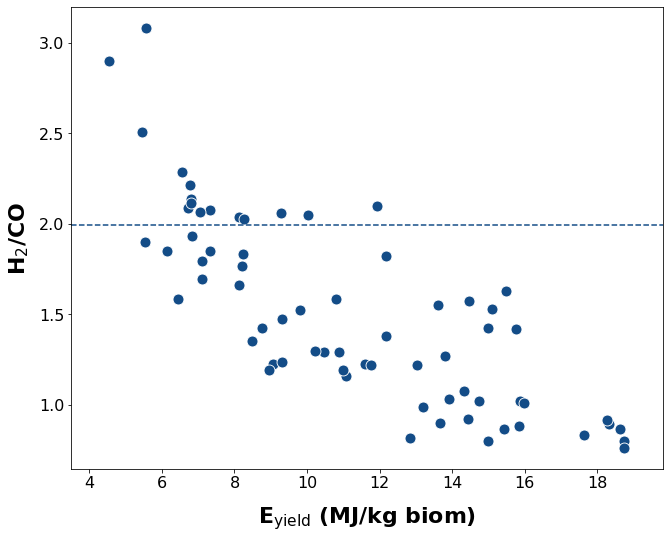

In [17]:
x_var=6
y_var=4
fig, ax = plt.subplots(1, 1, figsize=(10.6, 8.5))
x=df_predictions_mu.iloc[:,x_var]
y=df_predictions_mu.iloc[:,y_var]
sns.scatterplot(x=x, y=y, color='#134c87', s=120)
ax.axhline(y=1.995, linestyle='--', linewidth=1.5, color='#134c87')
ax.set_xlabel(output_names[x_var], fontsize=22, fontweight='bold', labelpad=14)
ax.set_ylabel(output_names[y_var], fontsize=22, fontweight='bold', labelpad=8)
ax.tick_params(labelsize=16)
ax.axes.set_xlim(3.5, 19.8)
ax.axes.set_xticks(np.arange(4, 20, 2))
plt.show()

### optimization of the process operating conditions

In [18]:
feature_T = np.linspace(FEATURES_GASIF.iloc[:,3].min(), FEATURES_GASIF.iloc[:,3].max(), 200)
feature_SA = np.linspace(0.33, FEATURES_GASIF.iloc[:,0].max(), 200)
dim1, dim2 = np.meshgrid(feature_T, feature_SA)

In [19]:
df_newBIOMASSES.head(1)

,BIOMASS_name,BIOMASS_name2,BIOMASS,ORIGIN,SA,SBR,HHVbiom (MJ/kg),T (K),SR,C (%),N (%),H (%),S (%),O (%),ash (%),VM (%),FC (%),MC (%),REFERENCE
0,almond hulls,almond hulls (ALH),ALH,fruit bunches,2.3333,2.0502,18.77,1173,0.25,46.5,1.15,5.97,0.04,40.16,6.18,73.21,20.61,8.18,https://phyllis.nl/


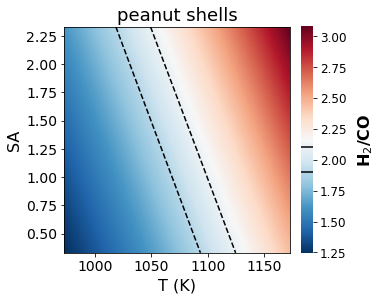

In [21]:
n=36
min_ratio=1.9
max_ratio=2.1
biomass_predict = df_newBIOMASSES.iloc[:,[4,5,6,7,8,9,11,13,14,15,16,17]].iloc[n,:]
mesh_df = np.array([biomass_predict for i in range(dim1.size)])
mesh_df[:,3] = dim1.ravel()
mesh_df[:,0] = dim2.ravel()

Z = predict_H2CO(mesh_df, model, x_scaler, y_scaler)[0].reshape(dim1.shape)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.imshow(Z, cmap='RdBu_r', origin='lower', extent=[973, 1173, 0.33, 2.33])
ax.set_aspect(100)
ax.set_title(df_newBIOMASSES['BIOMASS_name'][n], fontsize=18)
ax.set_xlabel('T (K)', fontsize=16)
ax.set_ylabel('SA', fontsize=16)
ax.tick_params(labelsize=14)

contourlines = ax.contour(Z, levels=[min_ratio, max_ratio], extent=[973, 1173, 0.33, 2.33], linestyles='dashed',
                          colors='black', linewidths=1.5)

norm = plt.Normalize(min(Z.ravel()), max(Z.ravel()))
cbar = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)

ax2 = fig.colorbar(cbar, shrink=0.835, aspect=20, pad=0.04)
ax2.outline.set_visible(False) 
ax2.set_label(output_names[4], labelpad=10, fontsize=16, weight='bold')
ax2.ax.tick_params(labelsize=12)
ax2.add_lines(contourlines)
plt.show()

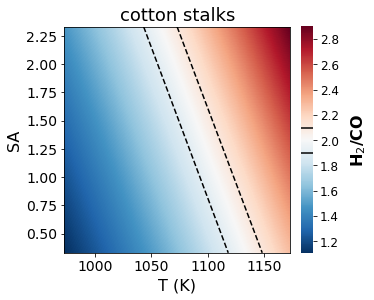

In [22]:
n=14
min_ratio=1.9
max_ratio=2.1
biomass_predict = df_newBIOMASSES.iloc[:,[4,5,6,7,8,9,11,13,14,15,16,17]].iloc[n,:]
mesh_df = np.array([biomass_predict for i in range(dim1.size)])
mesh_df[:,3] = dim1.ravel()
mesh_df[:,0] = dim2.ravel()

Z = predict_H2CO(mesh_df, model, x_scaler, y_scaler)[0].reshape(dim1.shape)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.imshow(Z, cmap='RdBu_r', origin='lower', extent=[973, 1173, 0.33, 2.33])
ax.set_aspect(100)
ax.set_title(df_newBIOMASSES['BIOMASS_name'][n], fontsize=18)
ax.set_xlabel('T (K)', fontsize=16)
ax.set_ylabel('SA', fontsize=16)
ax.tick_params(labelsize=14)

contourlines = ax.contour(Z, levels=[min_ratio, max_ratio], extent=[973, 1173, 0.33, 2.33], linestyles='dashed',
                          colors='black', linewidths=1.5)

norm = plt.Normalize(min(Z.ravel()), max(Z.ravel()))
cbar = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)

ax2 = fig.colorbar(cbar, shrink=0.835, aspect=20, pad=0.04)
ax2.outline.set_visible(False) 
ax2.set_label(output_names[4], labelpad=10, fontsize=16, weight='bold')
ax2.ax.tick_params(labelsize=12)
ax2.add_lines(contourlines)
plt.show()

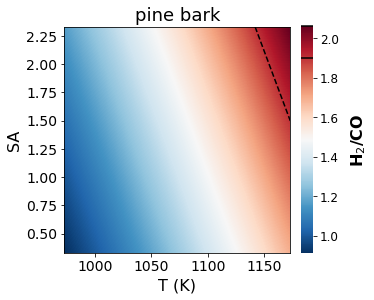

In [23]:
n=38
min_ratio=1.9
max_ratio=2.1
biomass_predict = df_newBIOMASSES.iloc[:,[4,5,6,7,8,9,11,13,14,15,16,17]].iloc[n,:]
mesh_df = np.array([biomass_predict for i in range(dim1.size)])
mesh_df[:,3] = dim1.ravel()
mesh_df[:,0] = dim2.ravel()

Z = predict_H2CO(mesh_df, model, x_scaler, y_scaler)[0].reshape(dim1.shape)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.imshow(Z, cmap='RdBu_r', origin='lower', extent=[973, 1173, 0.33, 2.33])
ax.set_aspect(100)
ax.set_title(df_newBIOMASSES['BIOMASS_name'][n], fontsize=18)
ax.set_xlabel('T (K)', fontsize=16)
ax.set_ylabel('SA', fontsize=16)
ax.tick_params(labelsize=14)

contourlines = ax.contour(Z, levels=[min_ratio, max_ratio], extent=[973, 1173, 0.33, 2.33], linestyles='dashed',
                          colors='black', linewidths=1.5)

norm = plt.Normalize(min(Z.ravel()), max(Z.ravel()))
cbar = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)

ax2 = fig.colorbar(cbar, shrink=0.835, aspect=20, pad=0.04)
ax2.outline.set_visible(False) 
ax2.set_label(output_names[4], labelpad=10, fontsize=16, weight='bold')
ax2.ax.tick_params(labelsize=12)
ax2.add_lines(contourlines)
plt.show()